In [ ]:
# Generalized Linear Model (Or Generalized Linear Regression)

https://en.wikipedia.org/wiki/Generalized_linear_model
    
The GLM (Generalized Linear Model) is a flexible generalization of 
ordinary linear regression that allows for response variables 
that have error distribution models other than a normal distribution. 

The GLM generalizes linear regression by allowing the linear model to be related to the response variable
via a link function and by allowing the magnitude of the variance of each measurement to be a 
function of its predicted value.



# Model components

https://en.wikipedia.org/wiki/Generalized_linear_model

The GLM consists of three elements:

1. An exponential family of probability distributions.
2. A linear predictor ${\displaystyle \eta =X\beta }$
3. A link function ${\displaystyle h} $ such that ${\displaystyle E(Y\mid X)=\mu =h^{-1}(\eta )}$

# Generalized Linear Regression

https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-regression

GLM (Generalized Linear Models) extend linear models in two ways.

First, the predicted values are linked to a linear combination of the 
input variables $X$ via an inverse link function  $h$ as:
    
$$\hat{y}(w, X) = h(Xw)$$.

Secondly, the squared loss function is replaced by the unit deviance $d$ of a distribution in the exponential family 
(or more precisely, a reproductive EDM (Exponential Dispersion Model).
 
The minimization problem becomes:
 
$$\min_{w} \frac{1}{2 n_{\text{samples}}} \sum_i d(y_i, \hat{y}_i) + \frac{\alpha}{2} ||w||_2$$,
 
where $\alpha$ is the L2 regularization penalty. 
 
When sample weights are provided, the average becomes a weighted average.

The following table lists some specific EDMs and 
their unit deviance (all of these are instances of the Tweedie family):

| Distribution | Target Domain              | Equation for Unit Deviance $ d(y, \hat{y})$  |
| :----------- | :------------              | :----------------------------------------------   |
| Normal       | $y \in (-\infty, \infty) $ | $ (y-\hat{y})^2 $                               |
| Poisson      | $y \in [0, \infty)$        | $ 2(y\log\frac{y}{\hat{y}}-y+\hat{y}) $         |
| Gamma        | $y \in (0, \infty)$        | $ 2(\log\frac{\hat{y}}{y}+\frac{y}{\hat{y}}-1)$ |
| Inverse Gaussian | $y \in (0, \infty)$    | $ \frac{(y-\hat{y})^2}{y\hat{y}^2} $            | 

The PDF (Probability Density Functions) of these distributions are 
illustrated in the following figure,

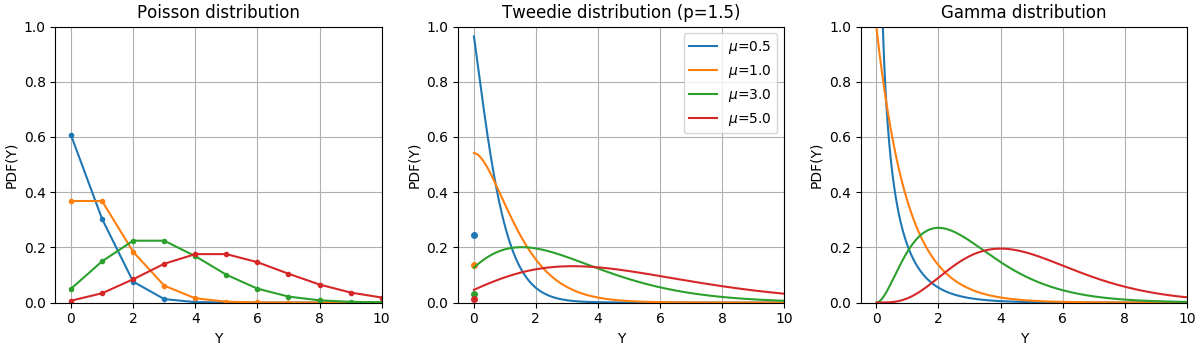

PDF of a random variable Y following Poisson, Tweedie (power=1.5) and Gamma distributions with different mean values ($\mu$).
Observe the point mass at $Y = 0 $ for the Poisson distribution and the Tweedie (power=1.5) distribution, but not for the Gamma distribution which has a strictly positive target domain.

The choice of the distribution depends on the problem at hand:

- If the target values $y$ are counts (non-negative integer valued) or relative frequencies (non-negative), you might use a Poisson deviance with log-link.
- If the target values are positive valued and skewed, you might try a Gamma deviance with log-link.
- If the target values seem to be heavier tailed than a Gamma distribution, you might try an Inverse Gaussian deviance (or even higher variance powers of the Tweedie family).

# Examples of use cases include:

- Agriculture / weather modeling: number of rain events per year (Poisson), amount of rainfall per event (Gamma), total rainfall per year (Tweedie / Compound Poisson Gamma).
- Risk modeling / insurance policy pricing: number of claim events / policyholder per year (Poisson), cost per event (Gamma), total cost per policyholder per year (Tweedie / Compound Poisson Gamma).
- Predictive maintenance: number of production interruption events per year (Poisson), duration of interruption (Gamma), total interruption time per year (Tweedie / Compound Poisson Gamma).

# Usage

TweedieRegressor implements a generalized linear model for the Tweedie distribution, that allows to model any of the above mentioned distributions using the appropriate power parameter. In particular:

- power = 0: Normal distribution. Specific estimators such as Ridge, ElasticNet are generally more appropriate in this case.
- power = 1: Poisson distribution. PoissonRegressor is exposed for convenience. However, it is strictly equivalent to TweedieRegressor(power=1, link='log').
- power = 2: Gamma distribution. GammaRegressor is exposed for convenience. However, it is strictly equivalent to TweedieRegressor(power=2, link='log').
- power = 3: Inverse Gaussian distribution.

The link function is determined by the link parameter.

## Usage example:

In [15]:
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import GammaRegressor

# Normal Distribtion
reg0 = TweedieRegressor(power=0, alpha=0.5, link='log')
print('reg0.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2]):')
print(reg0.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2]))
print()
#TweedieRegressor(alpha=0.5, link='log', power=0)
print ('reg0.coef_:')
print (reg0.coef_)
print()
#array([0.2463..., 0.4337...])
print('reg0.intercept_:')
print(reg0.intercept_)
print()
#-0.7638...

# Poisson Distribution
reg1 = TweedieRegressor(power=1, alpha=0.5, link='log')
print('reg1.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2]):')
reg1.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2])
print()
#TweedieRegressor(alpha=0.5, link='log', power=1)
print ('reg1.coef_:')
print (reg1.coef_)
print()
#array([0.2463..., 0.4337...])
print('reg1.intercept_:')
print(reg1.intercept_)
print()
#-0.7638

'''
# Gamma Distribution
reg2 = TweedieRegressor(power=2, alpha=0.5, link='log')
print('reg2.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2]):')
print(reg2.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2]))
print()
#TweedieRegressor(alpha=0.5, link='log', power=2)
print ('reg2.coef_:')
print (reg2.coef_)
print()
#array([0.2463..., 0.4337...])
print('reg2.intercept_:')
print(reg2.intercept_)
#-0.7638...

reg3 = TweedieRegressor(power=2, alpha=0.5, link='log')
print('reg3.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2]):')
print(reg3.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2]))
print()
#TweedieRegressor(alpha=0.5, link='log', power=2)
print ('reg3.coef_:')
print (reg3.coef_)
print()
#array([0.2463..., 0.4337...])
print('reg3.intercept_:')
print(reg3.intercept_)
#-0.7638...
'''

reg0.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2]):
TweedieRegressor(alpha=0.5, link='log', power=0)

reg0.coef_:
[0.24807559 0.34713823]

reg0.intercept_:
-0.5474100896000579

reg1.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2]):

reg1.coef_:
[0.24631611 0.43370317]

reg1.intercept_:
-0.7638091359123443



"\n# Gamma Distribution\nreg2 = TweedieRegressor(power=2, alpha=0.5, link='log')\nprint('reg2.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2]):')\nprint(reg2.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2]))\nprint()\n#TweedieRegressor(alpha=0.5, link='log', power=2)\nprint ('reg2.coef_:')\nprint (reg2.coef_)\nprint()\n#array([0.2463..., 0.4337...])\nprint('reg2.intercept_:')\nprint(reg2.intercept_)\n#-0.7638...\n\nreg3 = TweedieRegressor(power=2, alpha=0.5, link='log')\nprint('reg3.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2]):')\nprint(reg3.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2]))\nprint()\n#TweedieRegressor(alpha=0.5, link='log', power=2)\nprint ('reg3.coef_:')\nprint (reg3.coef_)\nprint()\n#array([0.2463..., 0.4337...])\nprint('reg3.intercept_:')\nprint(reg3.intercept_)\n#-0.7638...\n"

## Practical considerations

The feature matrix X should be standardized before fitting. 

This ensures that the penalty treats features equally.

Since the linear predictor $Xw$ can be negative and Poisson, Gamma and Inverse Gaussian distributions don’t support negative values, it is necessary to apply an inverse link function that guarantees the non-negativeness. 

For example with link='log', the inverse link function becomes $h(Xw)=\exp(Xw)$.

If you want to model a relative frequency, i.e. counts per exposure (time, volume, …) 
you can do so by using a Poisson distribution and passing $ y=\frac{\mathrm{counts}}{\mathrm{exposure}}$ as 
target values together with  as sample weights. 

For a concrete example see e.g. Tweedie regression on insurance claims.

When performing cross-validation for the power parameter of TweedieRegressor, 
it is advisable to specify an explicit scoring function, 
because the default scorer TweedieRegressor.score is a function of power itself.